In [4]:
# Task 1

import pandas as pd
df = pd.read_csv('Dataset .csv')


In [5]:
import pandas as pd
df = pd.read_csv('Dataset .csv')
print(df.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [15]:
# Create new features like 'Has Table Booking' and 'has online delivery' by encoding categorical values
import pandas as pd

df = pd.read_csv('Dataset .csv')

df['has table booking (encoded)'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['has online delivery (encoded)'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

df[['Has Table booking', 'has table booking (encoded)', 'Has Online delivery', 'has online delivery (encoded)']]


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ['Price range', 'Votes', 'has table booking (encoded)', 'has online delivery (encoded)']
target = "Aggregate rating"

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

#Decision tree
dt_model =DecisionTreeRegressor(random_state = 42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

#Random Forest
rf_model =RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

#linear regression
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

#Decision tree
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

#Random Forest
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

performance_lr = {"Linear Regression":{ "MAE": lr_mae, "MSE": lr_mse, "R2": lr_r2 }}
performance_dt = {"Decision Tree":{ "MAE": dt_mae, "MSE": dt_mse, "R2": dt_r2 }}
performance_rf = {"Random Forest":{ "MAE": rf_mae, "MSE": rf_mse, "R2": rf_r2 }}

performance_lr, performance_dt, performance_rf

({'Linear Regression': {'MAE': 1.0772848037682705,
   'MSE': 1.68555773030869,
   'R2': 0.25509557836537156}},
 {'Decision Tree': {'MAE': 0.2883888473071081,
   'MSE': 0.19771308345909694,
   'R2': 0.912623965684803}},
 {'Random Forest': {'MAE': 0.2642568522801721,
   'MSE': 0.1622495533707829,
   'R2': 0.9282964875418384}})

C:\Users\harsh\AppData\Local\Temp\ipykernel_13596\3138632641.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


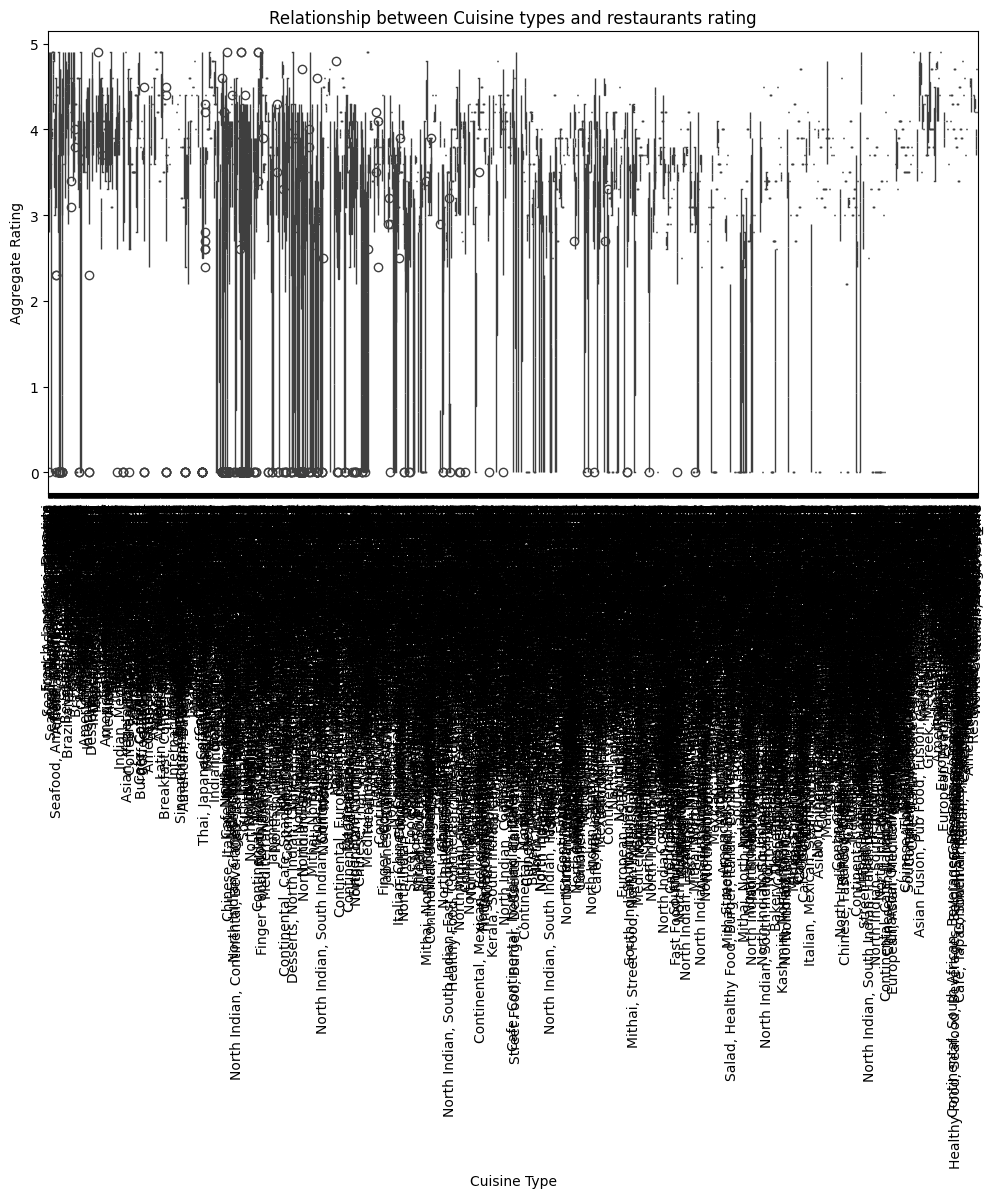

In [10]:
# Task 2 : Customer Prefernce analysis

# Analyze the types of cuisines and rating
import pandas as pd

df = pd.read_csv('Dataset .csv')
import matplotlib.pyplot as plt
import seaborn as sns

data_clean = df.dropna(subset = ["Cuisines", "Aggregate rating"])

cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.boxplot(x = "Cuisines", y = "Aggregate rating", data = df)
plt.xticks(rotation=90)
plt.title("Relationship between Cuisine types and restaurants rating")
plt.xlabel("Cuisine Type")
plt.ylabel("Aggregate Rating")
plt.tight_layout()
plt.show()

In [11]:
 # identify the most popular cuisines among customers based on number of votes

cuisines_votes = df.groupby('Cuisines')['Votes'].sum().reset_index()
cuisines_votes_sorted = cuisines_votes.sort_values(by="Votes", ascending = False)

print(cuisines_votes_sorted.head(10))

                            Cuisines  Votes
1514           North Indian, Mughlai  53747
1306                    North Indian  46241
1329           North Indian, Chinese  42012
331                             Cafe  30657
497                          Chinese  21925
1520  North Indian, Mughlai, Chinese  20115
828                        Fast Food  17852
1699                    South Indian  16433
1288           Mughlai, North Indian  15275
1031                         Italian  14799


                      Cuisines  Aggregate rating
1062             Italian, Deli               4.9
949          Hawaiian, Seafood               4.9
93     American, Sandwich, Tea               4.9
683        Continental, Indian               4.9
796    European, Asian, Indian               4.9
803     European, Contemporary               4.9
808           European, German               4.9
169   BBQ, Breakfast, Southern               4.9
41    American, Coffee and Tea               4.9
1779         Sunda, Indonesian               4.9


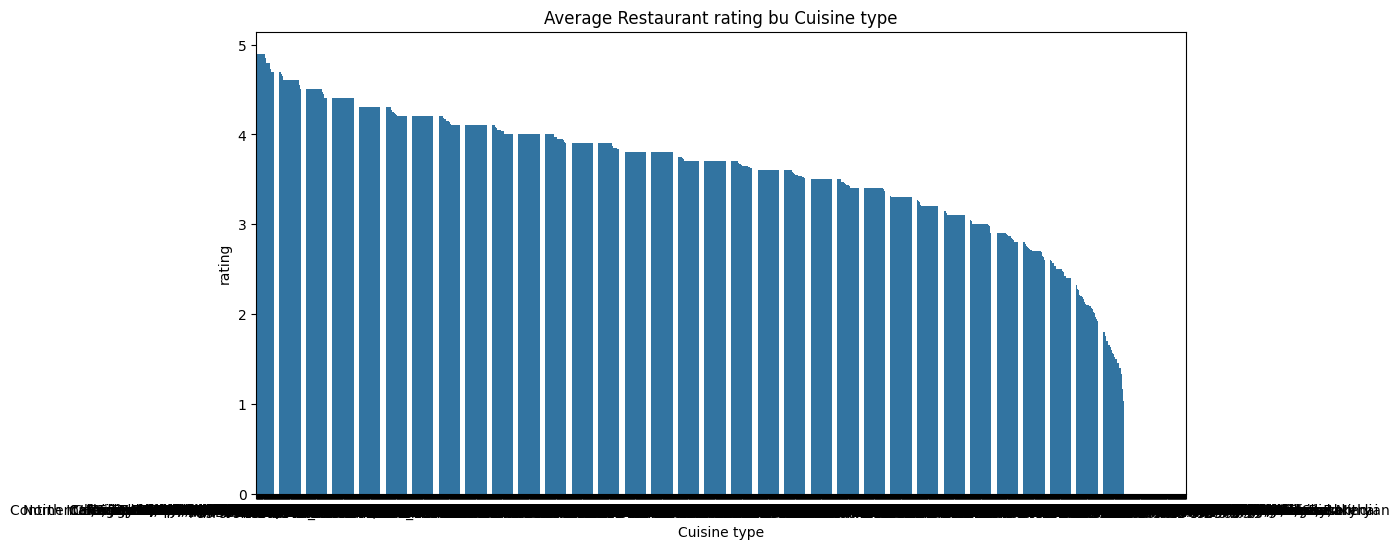

In [16]:
# Specific cuisines tends to recieve higher rating
import pandas as pd

df = pd.read_csv('Dataset .csv')
cuisines_rating = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisines_rating_sorted = cuisines_rating.sort_values(by = "Aggregate rating", ascending = False)

print(cuisines_rating_sorted.head(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x="Cuisines", y="Aggregate rating", data = cuisines_rating_sorted)
plt.title("Average Restaurant rating bu Cuisine type")
plt.xlabel("Cuisine type")
plt.ylabel('rating')
plt.show()

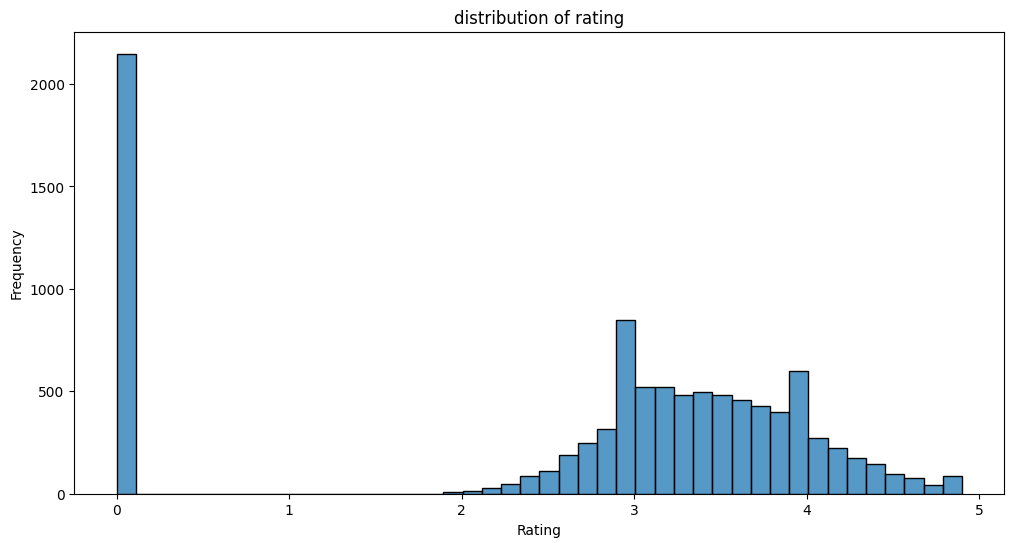

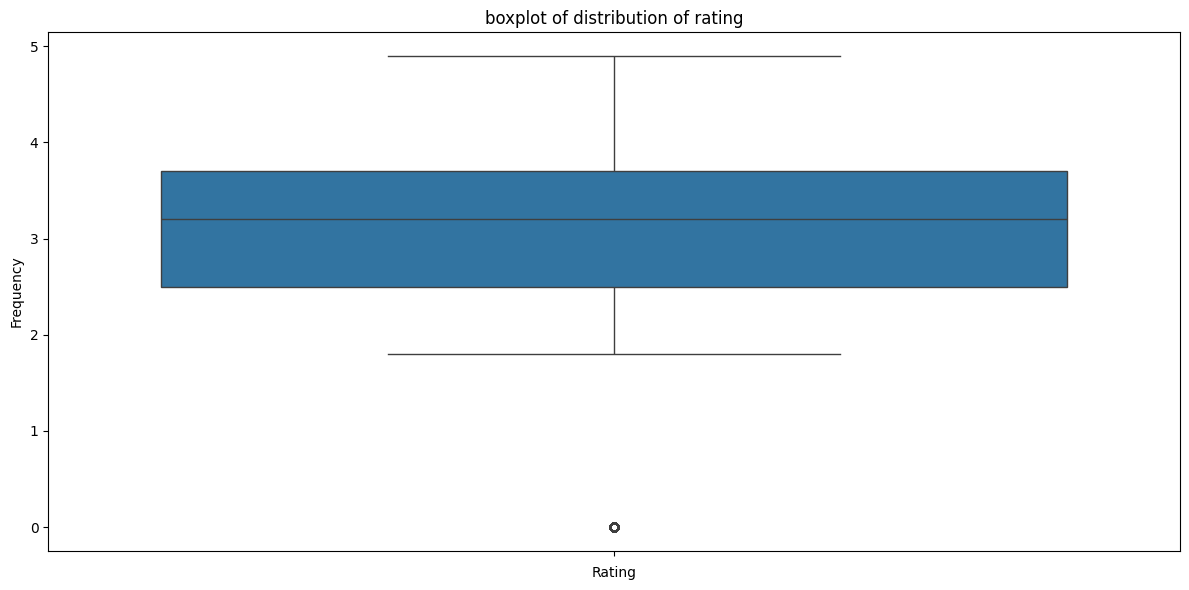

In [18]:
#task 3: Data visualization

# Create visualization to represent distribution of ratings

import pandas as pd
df = pd.read_csv("Dataset .csv")

import matplotlib.pyplot as plt
import seaborn as sns

#histogram
plt.figure(figsize=(12,6))
sns.histplot(df['Aggregate rating'])
plt.title("distribution of rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

#boxplot
plt.figure(figsize=(12,6))
sns.boxplot(df['Aggregate rating'])
plt.title("boxplot of distribution of rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# #barplot
# plt.figure(figsize=(12,6))
# sns.barplot(df['Aggregate rating'])
# plt.title("distribution of rating")
# plt.xlabel("Rating")
# plt.ylabel("Frequency")
# plt.show()

                      Cuisines  Aggregate rating
1062             Italian, Deli               4.9
949          Hawaiian, Seafood               4.9
93     American, Sandwich, Tea               4.9
683        Continental, Indian               4.9
796    European, Asian, Indian               4.9
803     European, Contemporary               4.9
808           European, German               4.9
169   BBQ, Breakfast, Southern               4.9
41    American, Coffee and Tea               4.9
1779         Sunda, Indonesian               4.9


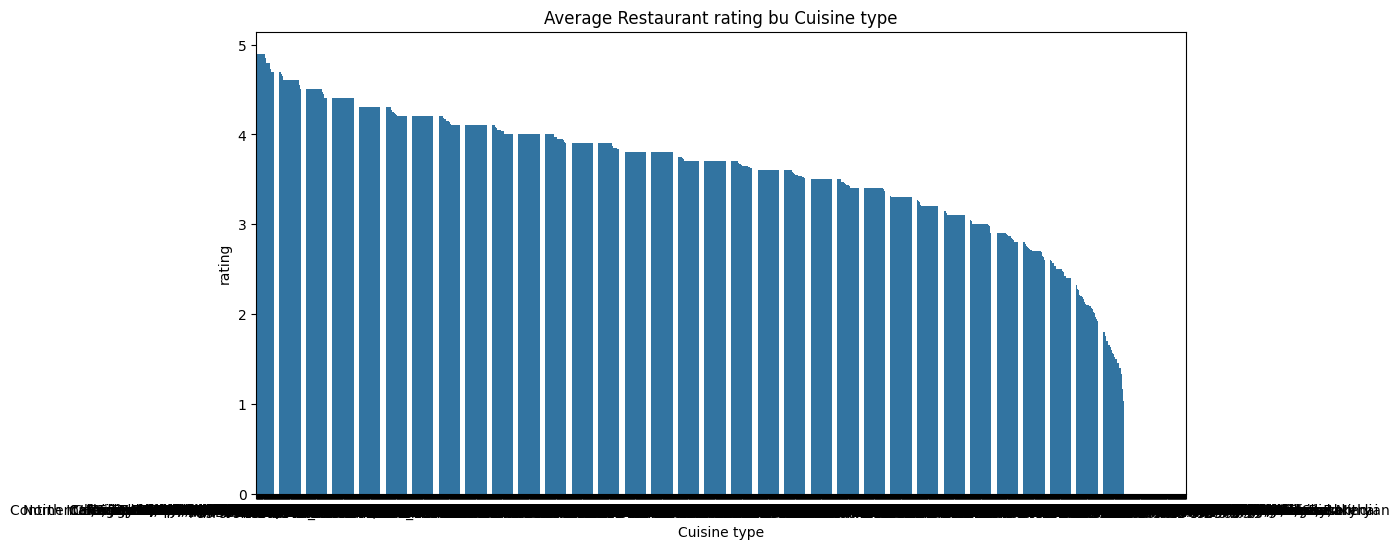

                 City  Aggregate rating
56         Inner City          4.900000
107       Quezon City          4.800000
73        Makati City          4.650000
95         Pasig City          4.633333
75   Mandaluyong City          4.625000
15         Beechworth          4.600000
67             London          4.535000
123       Taguig City          4.525000
122     Tagaytay City          4.500000
116      Secunderabad          4.500000


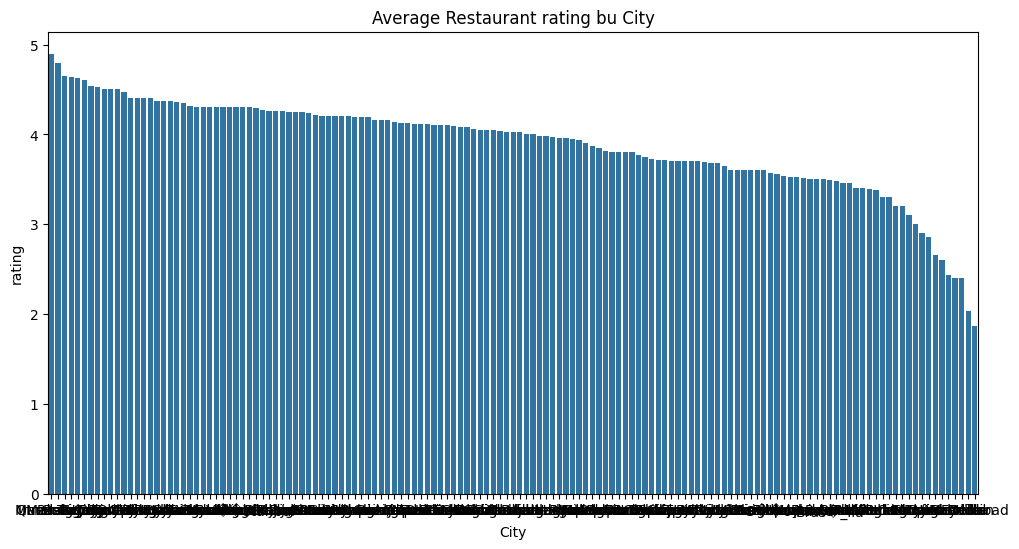

In [20]:
# average rating of different cuisines and cities 
#cuisines
import pandas as pd

df = pd.read_csv('Dataset .csv')
cuisines_rating = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisines_rating_sorted = cuisines_rating.sort_values(by = "Aggregate rating", ascending = False)

print(cuisines_rating_sorted.head(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x="Cuisines", y="Aggregate rating", data = cuisines_rating_sorted)
plt.title("Average Restaurant rating bu Cuisine type")
plt.xlabel("Cuisine type")
plt.ylabel('rating')
plt.show()

#cities

city_rating = df.groupby('City')['Aggregate rating'].mean().reset_index()
city_rating_sorted = city_rating.sort_values(by = "Aggregate rating", ascending = False)

print(city_rating_sorted.head(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x="City", y="Aggregate rating", data = city_rating_sorted)
plt.title("Average Restaurant rating bu City")
plt.xlabel("City")
plt.ylabel('rating')
plt.show()